In [226]:
from datetime import datetime
from datetime import date
import time
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [227]:
#read data
df=pd.read_csv("Uber Request Data.csv")

In [228]:
#show data
df.head(100)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
95,3353,City,11.0,Trip Completed,13-07-2016 13:29:44,13-07-2016 14:09:00
96,4293,City,11.0,Trip Completed,14-07-2016 06:42:36,14-07-2016 07:12:41
97,4936,City,11.0,Trip Completed,14-07-2016 18:22:17,14-07-2016 19:14:36
98,5661,Airport,11.0,Trip Completed,15-07-2016 07:08:50,15-07-2016 07:59:00


In [229]:
#information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [230]:
#cleaning data
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [231]:
df['Driver id'].fillna(0,inplace=True)
df['Driver id']=df['Driver id'].astype(int)
df.head(100)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
95,3353,City,11,Trip Completed,13-07-2016 13:29:44,13-07-2016 14:09:00
96,4293,City,11,Trip Completed,14-07-2016 06:42:36,14-07-2016 07:12:41
97,4936,City,11,Trip Completed,14-07-2016 18:22:17,14-07-2016 19:14:36
98,5661,Airport,11,Trip Completed,15-07-2016 07:08:50,15-07-2016 07:59:00


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Request id         6745 non-null   int64 
 1   Pickup point       6745 non-null   object
 2   Driver id          6745 non-null   int32 
 3   Status             6745 non-null   object
 4   Request timestamp  6745 non-null   object
 5   Drop timestamp     2831 non-null   object
dtypes: int32(1), int64(1), object(4)
memory usage: 289.9+ KB


In [233]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id               0
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [234]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6740    False
6741    False
6742    False
6743    False
6744    False
Length: 6745, dtype: bool

In [235]:
df.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Request id         6745 non-null   int64 
 1   Pickup point       6745 non-null   object
 2   Driver id          6745 non-null   int32 
 3   Status             6745 non-null   object
 4   Request timestamp  6745 non-null   object
 5   Drop timestamp     2831 non-null   object
dtypes: int32(1), int64(1), object(4)
memory usage: 342.5+ KB


In [236]:
df['Request timestamp']=pd.to_datetime(df['Request timestamp'])
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'])

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          6745 non-null   int32         
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(2)
memory usage: 289.9+ KB


In [238]:
df['Drop timestamp'].fillna(datetime(1,1,1,0,0,0,0),inplace=True) 

In [239]:
def update_date(i):
    return i.strftime("%Y-%m-%d %H:%M:%S.%MS")
df['Request timestamp']=df['Request timestamp'].map(update_date)
df['Drop timestamp']=df['Drop timestamp'].map(update_date)    
df.head(10)    

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1,Trip Completed,2016-11-07 11:51:00.51S,2016-11-07 13:00:00.00S
1,867,Airport,1,Trip Completed,2016-11-07 17:57:00.57S,2016-11-07 18:47:00.47S
2,1807,City,1,Trip Completed,2016-12-07 09:17:00.17S,2016-12-07 09:58:00.58S
3,2532,Airport,1,Trip Completed,2016-12-07 21:08:00.08S,2016-12-07 22:03:00.03S
4,3112,City,1,Trip Completed,2016-07-13 08:33:16.33S,2016-07-13 09:25:47.25S
5,3879,Airport,1,Trip Completed,2016-07-13 21:57:28.57S,2016-07-13 22:28:59.28S
6,4270,Airport,1,Trip Completed,2016-07-14 06:15:32.15S,2016-07-14 07:13:15.13S
7,5510,Airport,1,Trip Completed,2016-07-15 05:11:52.11S,2016-07-15 06:07:52.07S
8,6248,City,1,Trip Completed,2016-07-15 17:57:27.57S,2016-07-15 18:50:51.50S
9,267,City,2,Trip Completed,2016-11-07 06:46:00.46S,2016-11-07 07:25:00.25S


In [337]:
#data description
df.describe()

,Request id,Driver id
count,6745.000000,6745.000000
mean,3384.644922,90.764715
std,1955.099667,99.132418
min,1.000000,0.000000
25%,1691.000000,0.000000
50%,3387.000000,53.000000
75%,5080.000000,177.000000
max,6766.000000,300.000000


In [197]:
#how many trips is requested ?
df['Status'].value_counts().sum()

6745

In [198]:
#how many trips is completed ?
df[df['Status']=='Trip Completed']['Status'].value_counts().sum()

2831

In [199]:
#how many trips is canceled ?
df[df['Status']=='Cancelled']['Status'].value_counts().sum()

1264

In [200]:
#how many trips is No Cars Available ?
df[df['Status']=='No Cars Available']['Status'].value_counts().sum()

2650

In [201]:
#which Pickup point is the most requested ?
df['Pickup point'].max()

'City'

In [202]:
#which Pickup point is the least requested ?
df['Pickup point'].min()

'Airport'

In [216]:
#how many trip requested in July ?
month5_count=0
for i in df['Request timestamp']:
    if pd.to_datetime(i).month==7:
        month5_count+=1
month5_count

4071

In [218]:
#how many trip requested in August ?
month8_count=0
for i in df['Request timestamp']:
    if pd.to_datetime(i).month==12:
        month8_count+=1
month8_count

1307

In [252]:
#which month has the most requests and its number of requests in Request time?
months={}
for y in range(1,13):
    month_count=0
    for i in df['Request timestamp']:
        if pd.to_datetime(i).month==y:
            month_count+=1
    months[y]=month_count        
max_month=[i for i in months.keys() if months[i]==max(list(months.values()))]
for i in max_month:
    print('the most requested month :',i)
    print('number of requests :',months[i])

the most requested month : 7
number of requests : 4071


In [253]:
#which month has the most number of trips are completed and its number of trips in Request time?
months={}
for y in range(1,13):
    month_count=0
    for i in df[df['Status']=='Trip Completed']['Request timestamp']:
        if pd.to_datetime(i).month==y:
            month_count+=1
    months[y]=month_count        
max_month=[i for i in months.keys() if months[i]==max(list(months.values()))]
for i in max_month:
    print('the month has the most number of trips are completed :',i)
    print('number of trips :',months[i])

the month has the most number of trips are completed : 7
number of trips : 1668


In [254]:
#which month has the most number of trips are cancelled and its number of trips in Request time?
months={}
for y in range(1,13):
    month_count=0
    for i in df[df['Status']=='Cancelled']['Request timestamp']:
        if pd.to_datetime(i).month==y:
            month_count+=1
    months[y]=month_count        
max_month=[i for i in months.keys() if months[i]==max(list(months.values()))]
for i in max_month:
    print('the month has the most number of trips are cancelled :',i)
    print('number of trips :',months[i])

the month has the most number of trips are cancelled : 7
number of trips : 762


In [255]:
#which month has the most number of trips are No Cars Available and its number of trips in Request time?
months={}
for y in range(1,13):
    month_count=0
    for i in df[df['Status']=='No Cars Available']['Request timestamp']:
        if pd.to_datetime(i).month==y:
            month_count+=1
    months[y]=month_count        
max_month=[i for i in months.keys() if months[i]==max(list(months.values()))]
for i in max_month:
    print('the month has the most number of trips are No Cars Available :',i)
    print('number of trips :',months[i])

the month has the most number of trips are No Cars Available : 7
number of trips : 1641


In [256]:
#which day has the most requests and its number of requests in in Request time?
days={}
for y in range(1,32):
    day_count=0
    for i in df['Request timestamp']:
        if pd.to_datetime(i).day==y:
            day_count+=1
    days[y]=day_count        
max_day=[i for i in days.keys() if days[i]==max(list(days.values()))]
for i in max_day:
    print('the most requested day :',i)
    print('number of requests :',days[i])

the most requested day : 7
number of requests : 2674


In [258]:
#which month has the most number of trips are completed and its number of trips in Request time?
days={}
for y in range(1,32):
    day_count=0
    for i in df[df['Status']=='Trip Completed']['Request timestamp']:
        if pd.to_datetime(i).day==y:
            day_count+=1
    days[y]=day_count        
max_day=[i for i in days.keys() if days[i]==max(list(days.values()))]
for i in max_day:
    print('the month has the most number of trips are completed :',i)
    print('number of trips :',days[i])

the month has the most number of trips are completed : 7
number of trips : 1163


In [259]:
#which month has the most number of trips are cancelled and its number of trips in Request time?
days={}
for y in range(1,32):
    day_count=0
    for i in df[df['Status']=='Cancelled']['Request timestamp']:
        if pd.to_datetime(i).day==y:
            day_count+=1
    days[y]=day_count        
max_day=[i for i in days.keys() if days[i]==max(list(days.values()))]
for i in max_day:
    print('the month has the most number of trips are cancelled :',i)
    print('number of trips :',days[i])

the month has the most number of trips are cancelled : 7
number of trips : 502


In [260]:
#which month has the most number of trips are No Cars Available and its number of trips in Request time?
days={}
for y in range(1,32):
    day_count=0
    for i in df[df['Status']=='No Cars Available']['Request timestamp']:
        if pd.to_datetime(i).day==y:
            day_count+=1
    days[y]=day_count        
max_day=[i for i in days.keys() if days[i]==max(list(days.values()))]
for i in max_day:
    print('the month has the most number of trips are No Cars Available :',i)
    print('number of trips :',days[i])

the month has the most number of trips are No Cars Available : 7
number of trips : 1009


In [274]:
#What is the drops time of completed trips?
df[df['Status']=='Trip Completed']['Drop timestamp']

0       2016-11-07 13:00:00.00S
1       2016-11-07 18:47:00.47S
2       2016-12-07 09:58:00.58S
3       2016-12-07 22:03:00.03S
4       2016-07-13 09:25:47.25S
                 ...           
2826    2016-11-07 23:35:00.35S
2827    2016-07-13 07:20:52.20S
2828    2016-07-13 13:16:03.16S
2829    2016-07-13 23:43:13.43S
2830    2016-07-15 09:56:07.56S
Name: Drop timestamp, Length: 2831, dtype: object

In [275]:
#What is the requests time of completed trips?
df[df['Status']=='Trip Completed']['Request timestamp']

0       2016-11-07 11:51:00.51S
1       2016-11-07 17:57:00.57S
2       2016-12-07 09:17:00.17S
3       2016-12-07 21:08:00.08S
4       2016-07-13 08:33:16.33S
                 ...           
2826    2016-11-07 22:54:00.54S
2827    2016-07-13 06:31:22.31S
2828    2016-07-13 12:33:21.33S
2829    2016-07-13 22:26:08.26S
2830    2016-07-15 09:07:09.07S
Name: Request timestamp, Length: 2831, dtype: object

In [276]:
#What is the requests time of cancelled trips?
df[df['Status']=='Cancelled']['Request timestamp']

2831    2016-07-13 06:08:41.08S
2832    2016-07-14 17:07:58.07S
2833    2016-07-14 20:51:37.51S
2834    2016-07-15 10:12:40.12S
2835    2016-12-07 19:14:00.14S
                 ...           
4090    2016-12-07 07:20:00.20S
4091    2016-07-14 05:03:10.03S
4092    2016-07-14 05:06:40.06S
4093    2016-07-14 08:30:59.30S
4094    2016-07-14 05:46:06.46S
Name: Request timestamp, Length: 1264, dtype: object

In [277]:
#What is the requests time of No cars available trips?
df[df['Status']=='No Cars Available']['Request timestamp']

4095    2016-11-07 00:02:00.02S
4096    2016-11-07 00:06:00.06S
4097    2016-11-07 00:09:00.09S
4098    2016-11-07 00:23:00.23S
4099    2016-11-07 00:30:00.30S
                 ...           
6740    2016-07-15 23:49:03.49S
6741    2016-07-15 23:50:05.50S
6742    2016-07-15 23:52:06.52S
6743    2016-07-15 23:54:39.54S
6744    2016-07-15 23:55:03.55S
Name: Request timestamp, Length: 2650, dtype: object

In [299]:
#what is id of driver who has the most number of requests?
df['Driver id'].value_counts()[1:2]

27    22
Name: Driver id, dtype: int64

In [300]:
#what is ids of drivers that has completed trips?
df[df['Status']=='Trip Completed']['Driver id']

0         1
1         1
2         1
3         1
4         1
       ... 
2826    300
2827    300
2828    300
2829    300
2830    300
Name: Driver id, Length: 2831, dtype: int32

In [301]:
#what is ids of drivers that has cancelled trips?
df[df['Status']=='Cancelled']['Driver id']

2831      1
2832      1
2833      1
2834      1
2835      2
       ... 
4090    299
4091    299
4092    299
4093    299
4094    300
Name: Driver id, Length: 1264, dtype: int32

In [303]:
#what is id of driver that has the most number of completed trips?
df[df['Status']=='Trip Completed']['Driver id'].value_counts()[0:1]

22    16
Name: Driver id, dtype: int64

In [304]:
#what is id of driver that has the most number of cancelled trips?
df[df['Status']=='Cancelled']['Driver id'].value_counts()[0:1]

84    12
Name: Driver id, dtype: int64

In [306]:
#what is ids of drivers that has pickup point is Airport ?
df[df['Pickup point']=='Airport']['Driver id']

0       1
1       1
3       1
5       1
6       1
       ..
6734    0
6735    0
6736    0
6741    0
6744    0
Name: Driver id, Length: 3238, dtype: int32

In [307]:
#what is ids of drivers that has pickup point is City ?
df[df['Pickup point']=='City']['Driver id']

2       1
4       1
8       1
9       2
11      2
       ..
6738    0
6739    0
6740    0
6742    0
6743    0
Name: Driver id, Length: 3507, dtype: int32

In [312]:
#what is id of driver that has the most number of pickup point of trips is Airport ?
df[df['Pickup point']=='Airport']['Driver id'].value_counts()[1:2]

225    11
Name: Driver id, dtype: int64

In [315]:
#what is id of driver that has the most number of pickup point of trips is City ?
df[df['Pickup point']=='City']['Driver id'].value_counts()[1:2]

197    17
Name: Driver id, dtype: int64

<AxesSubplot:xlabel='Status', ylabel='Driver id'>

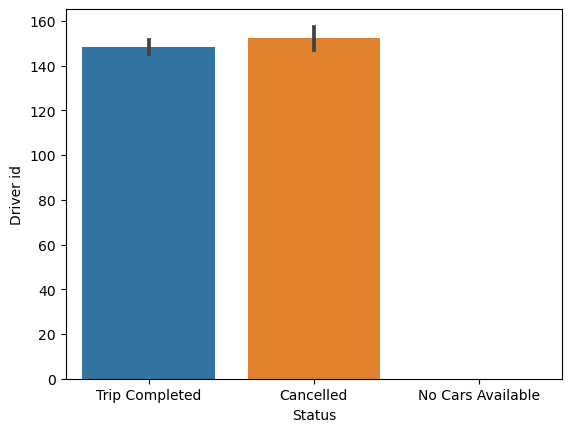

In [316]:
sns.barplot(x='Status',y='Driver id',data=df)

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

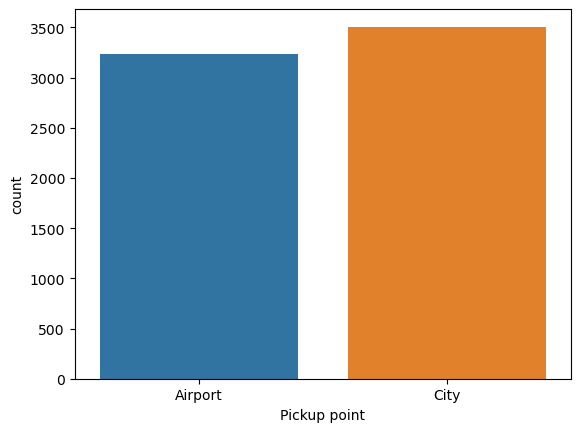

In [317]:
sns.countplot(x='Pickup point',data=df)

<AxesSubplot:xlabel='Status', ylabel='Request id'>

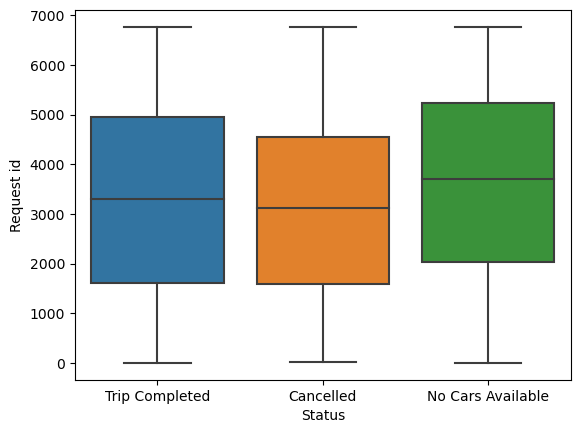

In [321]:
sns.boxplot(x='Status',y='Request id',data=df)

<AxesSubplot:xlabel='Driver id', ylabel='Density'>

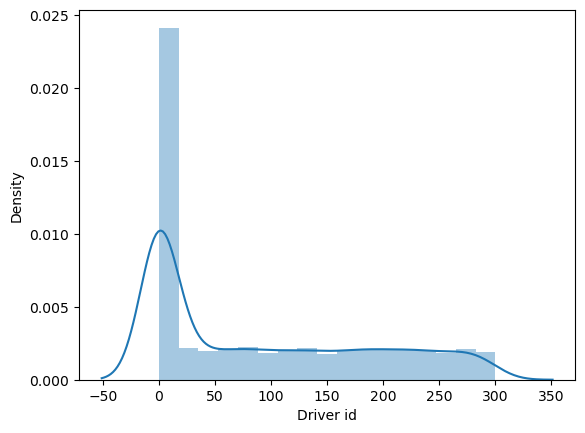

In [326]:
sns.distplot(df['Driver id'])

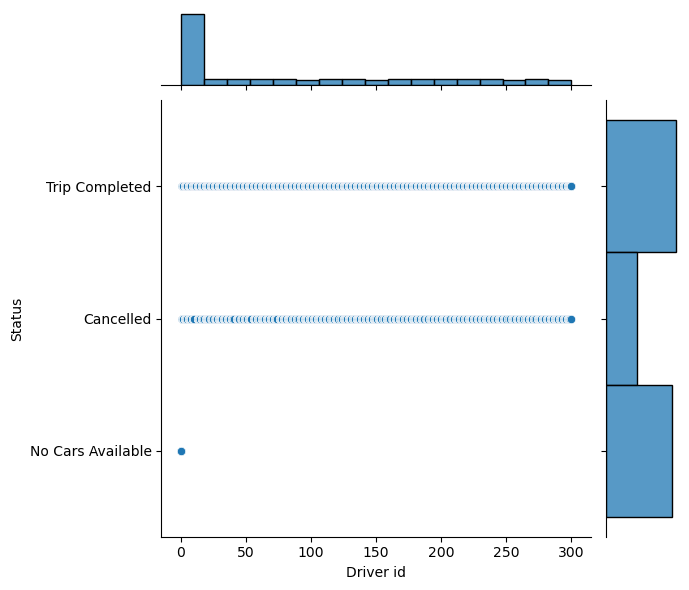

In [328]:
sns.jointplot(x='Driver id',y='Status',data=df,kind='scatter')

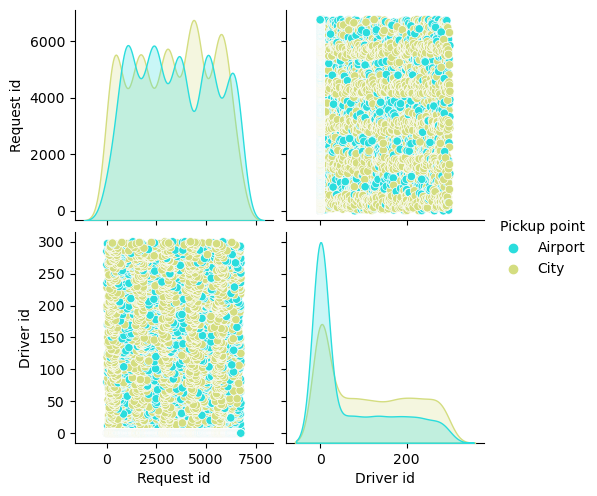

In [332]:
sns.pairplot(df,hue='Pickup point',palette='rainbow')

<AxesSubplot:>

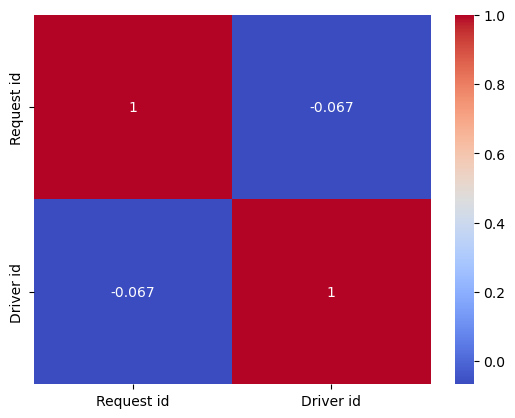

In [333]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

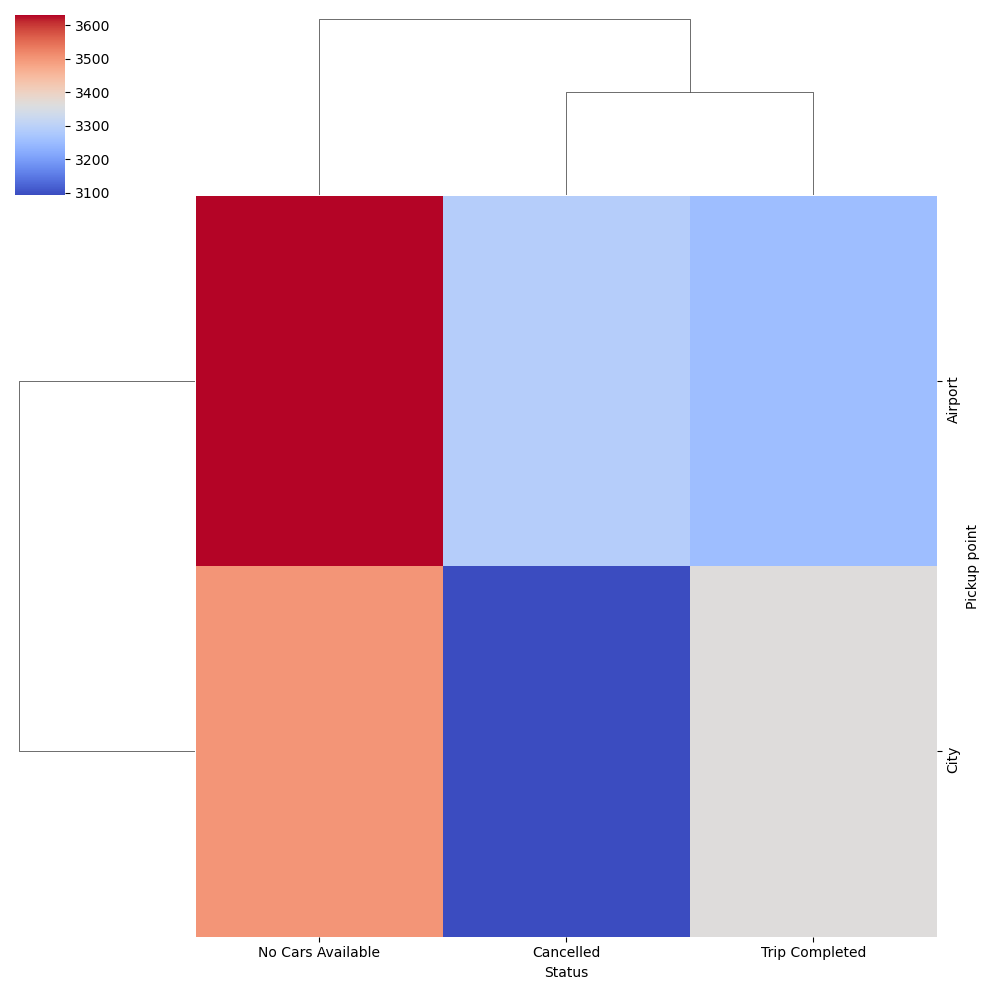

In [335]:
pv_df=df.pivot_table(values='Request id',index='Pickup point',columns='Status')
sns.clustermap(pv_df,cmap='coolwarm')